# Корреляция и регрессия

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/solidtalk)

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# нужный датасет встроен в библиотеку sklearn
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
# добавляем target в сами данные
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. Она была получена из архива StatLib и широко использовалась в литературе для оценки алгоритмов.

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота 
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

## Корреляция

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


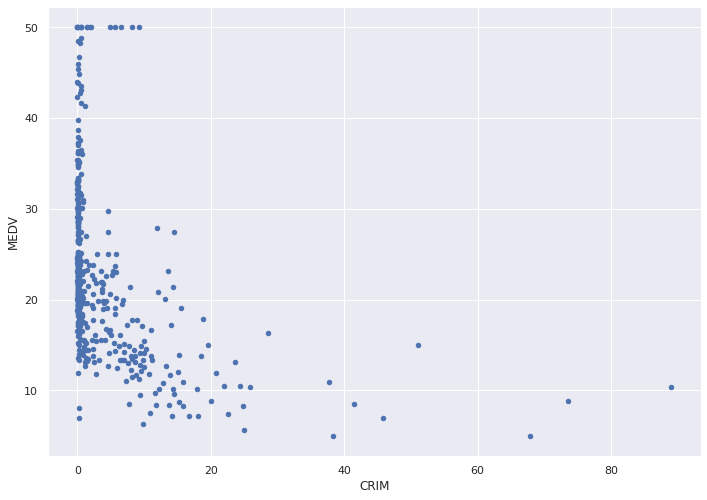

In [ ]:
# визуализируем взаимосвязь преступности и цены дома
df.plot(kind='scatter', x='CRIM', y='MEDV')

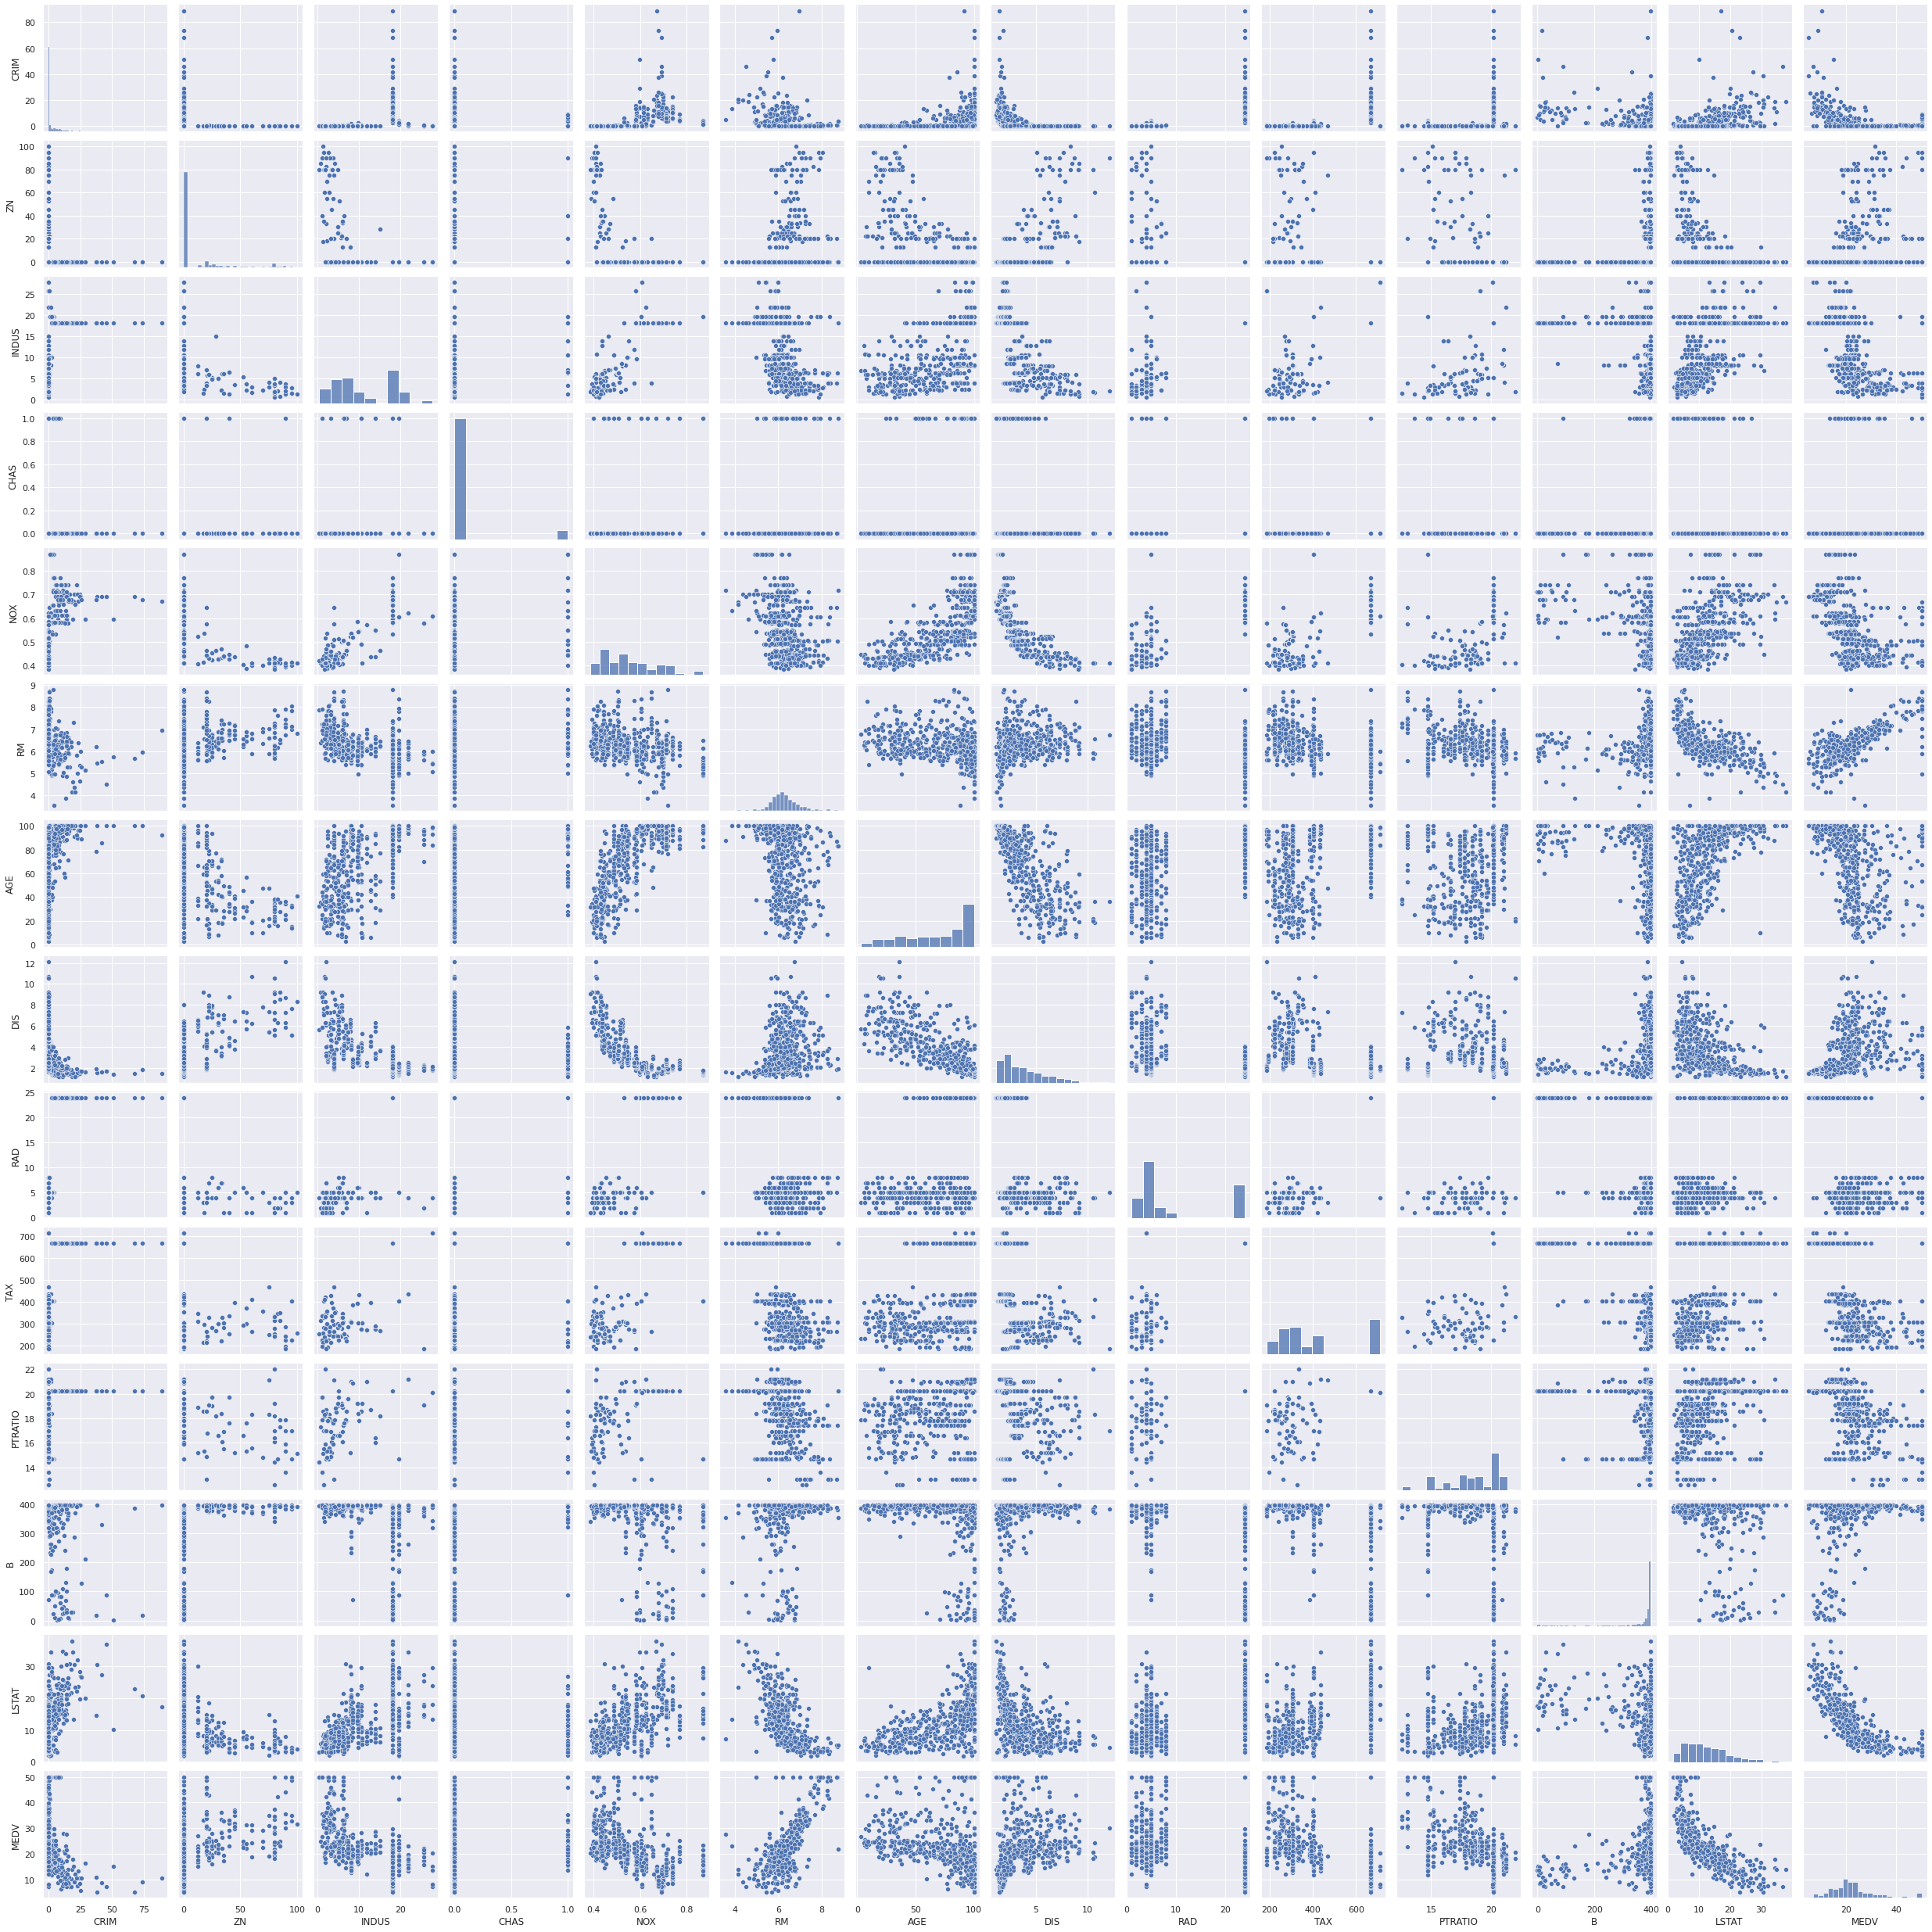

In [ ]:
# можем использовать pairplot для изучения взаимосвязи между множеством признаков
sns.pairplot(df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


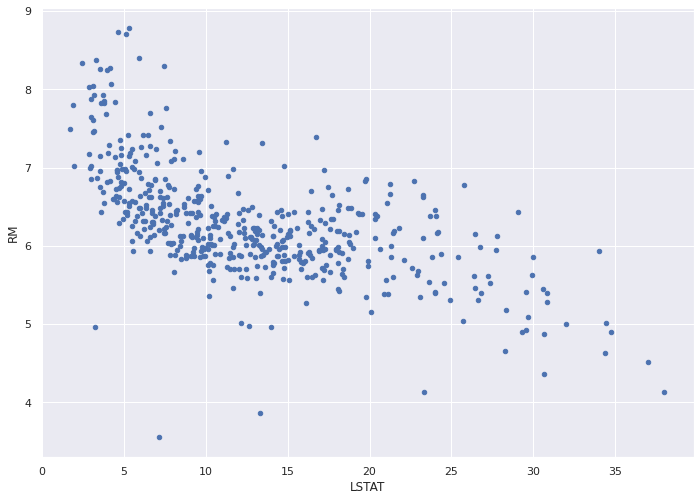

In [ ]:
# изучаем взаимосвязь между населением низкого соц. статуса и количеством комнат в доме
df.plot(kind='scatter', x='LSTAT', y='RM')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


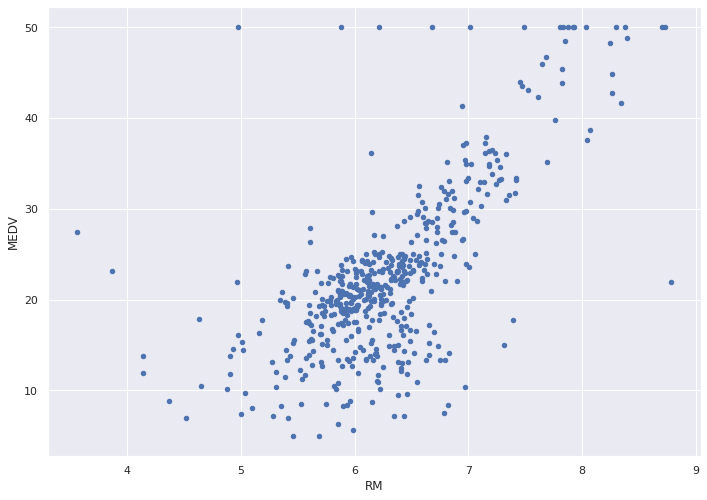

In [ ]:
# изучаем взаимосвязь между ценой и количеством комнат в доме
df.plot(kind='scatter', x='RM', y='MEDV')

In [ ]:
# считаем коэф. корреляции Пирсона
df[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [ ]:
# считаем коэф. корреляции Спирмана
df[['RM', 'MEDV']].corr(method='spearman')

,RM,MEDV
RM,1.000000,0.633576
MEDV,0.633576,1.000000


In [ ]:
# считаем коэф. корреляции Кенделла
df[['RM', 'MEDV']].corr(method='kendall')

,RM,MEDV
RM,1.000000,0.482829
MEDV,0.482829,1.000000


In [ ]:
# можем посчитать коэффициенты корреляции между всеми показателями
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


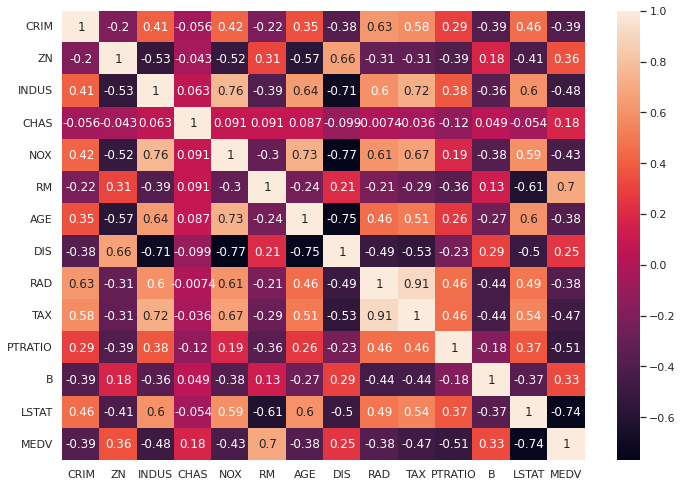

In [ ]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

## Регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['RM']]
y = df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(354, 1)

In [ ]:
y_train.shape

(354,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_

array([9.1181022])

In [ ]:
model.intercept_

-34.662307438406785

In [ ]:
# y = 9.11 * x - 34

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([23.83943626, 26.95782721, 19.89129801, 20.63898239, 22.7543821 ,
       22.59025626, 19.26214896, 21.63285553, 22.13435115, 20.2924945 ,
       19.59951874, 20.08277815,  6.54239639, 22.16170546, 17.3838199 ,
       28.9820459 , 18.94301538,  9.83403128, 37.14274737, 21.73315465,
       22.23465027, 24.441231  , 17.42941041, 25.45334035, 20.10101436,
       14.82163319, 18.89742487, 26.68428415, 19.68158166, 18.16797669,
       16.143758  , 23.93061728, 32.01837393, 14.22895654, 20.07366005,
       17.39293801, 30.85125685, 18.85183436, 20.62986429, 22.28024078,
       14.48426341, 27.78757451, 38.59252561, 16.34435625, 23.84855436,
       17.42941041, 17.31999319, 23.84855436, 21.56902881, 25.28921451,
       20.12836867, 28.87262867, 21.34107626, 27.16754356, 33.44991598,
       22.89115363, 22.04317013, 27.89699174, 23.5932475 , 16.44465538,
       26.99429962, 31.43481539, 25.07949816, 15.08605815, 25.32568692,
       14.0648307 , 24.34093188, 22.79997261, 25.47157655, 19.82

In [ ]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.4584649934303068

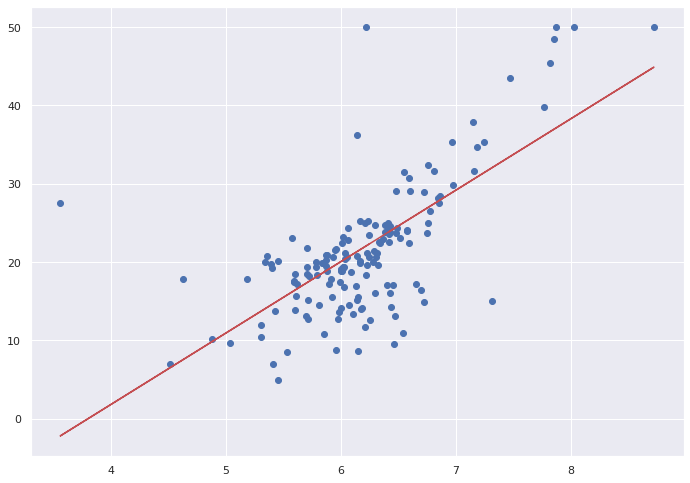

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Альтернативный способ из statsmodel

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_const

,const,RM
5,1.0,6.430
116,1.0,6.176
45,1.0,5.682
16,1.0,5.935
468,1.0,5.926
...,...,...
106,1.0,5.836
270,1.0,5.856
348,1.0,6.635
435,1.0,6.629


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     335.4
Date:                Mon, 23 May 2022   Prob (F-statistic):           4.28e-53
Time:                        18:11:13   Log-Likelihood:                -1176.1
No. Observations:                 354   AIC:                             2356.
Df Residuals:                     352   BIC:                             2364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6623      3.170    -10.935      0.0

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const   -34.662307
RM        9.118102
dtype: float64
R2:  0.48788928532759923


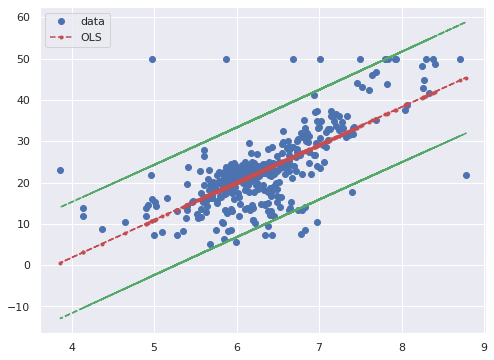

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

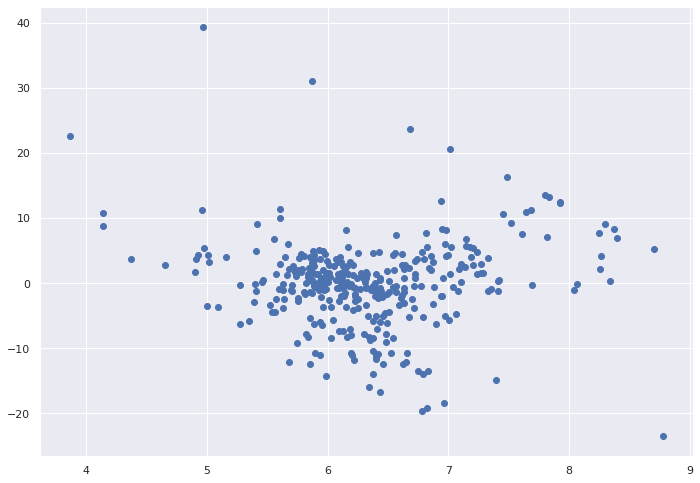

In [ ]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([  4.,  18.,  42., 164., 100.,  20.,   1.,   3.,   1.,   1.]),
 array([-23.49462985, -17.21063292, -10.92663598,  -4.64263904,
          1.64135789,   7.92535483,  14.20935177,  20.49334871,
         26.77734564,  33.06134258,  39.34533952]),
 <a list of 10 Patch objects>)

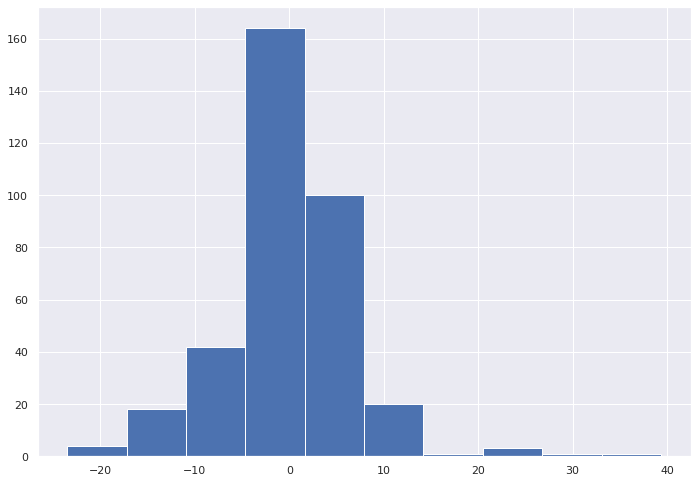

In [ ]:
plt.hist(results.resid)